# Shell shape and Radius of Curvature. Algebraic formalism.

In [65]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from equation6 import Shell
%matplotlib inline

the idea is to compare the contact discontinuity shape obtained with the numeric solution vs the analitic approximation at lower angles. The same for the inner shock and also compare with the radius of curvature obtained algebraically.

### Outer shell

In [66]:
beta=0.01
shell = Shell(beta=beta,innertype="isotropic")
theta = np.linspace(0,np.radians(130),800)
R = shell.radius(theta)
x=R*np.cos(theta)
y=R*np.sin(theta)

### Approximation outer shell

In [67]:
R_ap = R[0]*(1+(2*np.sqrt(beta)+1)*theta**2/6)
x_ap = R_ap*(1-theta**2/2)
y_ap = R_ap*theta*(1-theta**2/6)
Rc = 1.5*R[0]/(1-np.sqrt(beta))
xc = Rc*np.cos(np.linspace(-np.pi,np.pi))-Rc+R[0]
yc = Rc*np.sin(np.linspace(-np.pi,np.pi))

### Inner shell

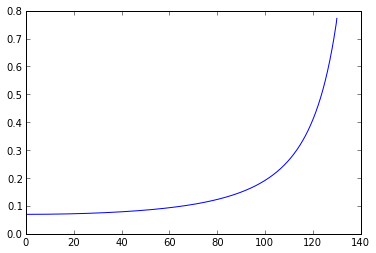

In [68]:
M = 3.0
H0 = 3./(4*M**2+7)
n = 3.4*(4.*M**2+1)/(4*M**2+19)
tana=np.zeros_like(x)
tana[:-1] = np.diff(y)/np.diff(x)
tana[-1]=tana[-2]
a = -np.arctan(tana)
psi = theta+a-0.5*np.pi
Rin = R[0]*(R/R[0]-H0*np.cos(psi)**(-(n+1)))
xin = Rin*np.cos(theta)
yin = Rin*np.sin(theta)
plt.plot(np.degrees(theta),H0*np.cos(psi)**(-n));

### Approximation inner shell

In [69]:
Rin_ap = R[0]*(1-H0 +(2*np.sqrt(beta)+1+3*H0*(n+1))*theta**2/6)
xin_ap = Rin_ap*(1-theta**2/2)
yin_ap = Rin_ap*theta*(1-theta**2/6)
Rc_in = 3*R[0]*(1-H0)**2/np.abs(2*(1-np.sqrt(beta))-3*H0*(n+2))
xcin = Rc_in*np.cos(np.linspace(-np.pi,np.pi))-Rc_in+R[0]*(1-H0)
ycin = Rc_in*np.sin(np.linspace(-np.pi,np.pi))

### Plot Everything

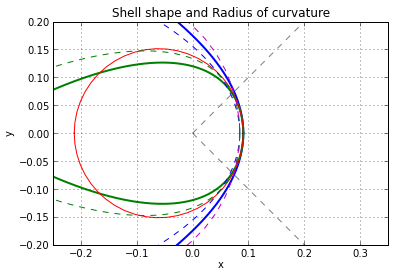

In [71]:
plt.plot(x,y,x,-y,"b-",lw=2)
plt.plot(x_ap,y_ap,x_ap,-y_ap,"g-",lw=2)
plt.plot(xc,yc,"r-")
plt.plot(xin,yin,"b--",xin,-yin,"b--")
plt.plot(xin_ap,yin_ap,"g--",xin_ap,-yin_ap,"g--")
plt.plot(xcin,ycin,"m--")
m1 = np.linspace(0,.2)
plt.plot(m1,m1,"k--",m1,-m1,"k--",alpha=0.5)
plt.grid()
plt.axis("equal")
plt.xlim(0,0.1)
plt.ylim(-0.2,0.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Shell shape and Radius of curvature");